In [22]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"cansuzm","key":"2af7fc1223fe70fdac22bc3d1f2c5c50"}'}

In [23]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle datasets download -d cansuzm/BreastUltrasoundImages

Dataset URL: https://www.kaggle.com/datasets/cansuzm/BreastUltrasoundImages
License(s): unknown
BreastUltrasoundImages.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import zipfile
import os

with zipfile.ZipFile('BreastUltrasoundImages.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)
from tensorflow.keras.applications import ResNet50

In [27]:
# HER CLASS DAN 2 GÖRSEL ÇİZDİRME

folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2:
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

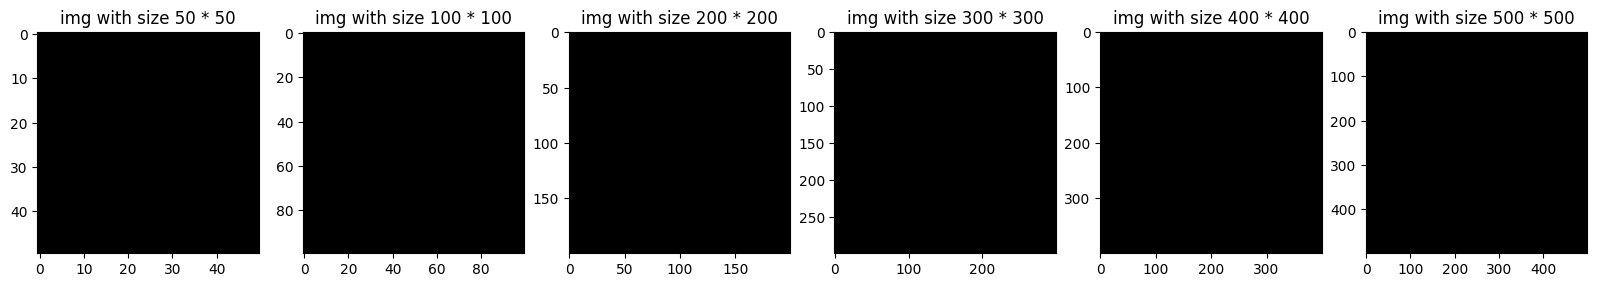

In [28]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()

In [29]:
img_sz=300

In [30]:
# DATAYI YÜKLEME

training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])

create_training_data()

benign 0


100%|██████████| 891/891 [00:04<00:00, 194.11it/s]


malignant 1


100%|██████████| 421/421 [00:03<00:00, 119.24it/s]


normal 2


100%|██████████| 266/266 [00:03<00:00, 68.88it/s] 


In [31]:
# İLK 5 GÖRSELİN SINIFINI GÖRÜNTÜLEME

for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [32]:
# SON 5 GÖRSELİN SINIFLARINI GÖRÜNTÜLEME

for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 1578 : 2
Class number for image 1577 : 2
Class number for image 1576 : 2
Class number for image 1575 : 2
Class number for image 1574 : 2


In [33]:
# ARTIK VERİLER SIRASIYLA ÖNCE İYİ HUYLU, SONRA KÖTÜ HUYLU VE ARDINDAN NORMAL GÖRÜNTÜLERE SAHİP . VERİLERİ KARIŞTIRALIM.
# KARIŞTIRMADAN SONRAKİ İLK 20 SINIFI GÖRÜNTÜLEME :

random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n")

Sample 1:
Class number: 0 

Sample 2:
Class number: 1 

Sample 3:
Class number: 0 

Sample 4:
Class number: 1 

Sample 5:
Class number: 0 

Sample 6:
Class number: 0 

Sample 7:
Class number: 0 

Sample 8:
Class number: 0 

Sample 9:
Class number: 0 

Sample 10:
Class number: 0 

Sample 11:
Class number: 0 

Sample 12:
Class number: 2 

Sample 13:
Class number: 0 

Sample 14:
Class number: 0 

Sample 15:
Class number: 0 

Sample 16:
Class number: 1 

Sample 17:
Class number: 1 

Sample 18:
Class number: 0 

Sample 19:
Class number: 0 

Sample 20:
Class number: 0 

Sample 21:
Class number: 0 

Sample 22:
Class number: 0 

Sample 23:
Class number: 0 

Sample 24:
Class number: 1 

Sample 25:
Class number: 0 

Sample 26:
Class number: 2 

Sample 27:
Class number: 0 

Sample 28:
Class number: 1 

Sample 29:
Class number: 2 

Sample 30:
Class number: 0 



In [34]:
# FUTURE SELECTION (PARAMETRE SEÇİMİ)

X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

In [35]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1578, 300, 300)
(1578,)


In [36]:
# VERİYİ BÖLME

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1262, 300, 300)
(1262,)
(316, 300, 300)
(316,)


In [37]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [38]:
# X İN GÖRÜNTÜLERİNİ ÖLÇEKLENDİRME

X_train = X_train/255
X_test = X_test/255

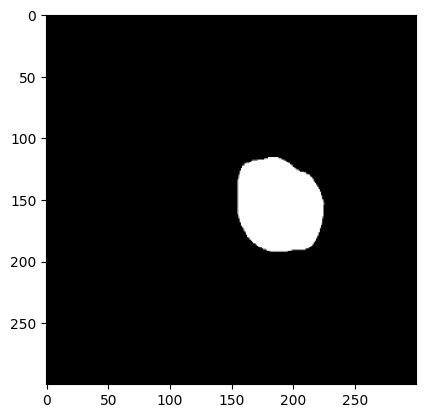

In [39]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [40]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri yüklemesi ve işleme
folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']
img_sz = 224  # ResNet için 224x224 boyutuna yeniden boyutlandır

# Veriyi yükle ve işle
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))
            rgb_array = cv2.cvtColor(new_array, cv2.COLOR_GRAY2RGB)  # Gri tonlamalı görüntüyü RGB'ye dönüştür
            training_data.append([rgb_array, class_num])

create_training_data()
random.shuffle(training_data)

X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Piksel değerlerini normalize et
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veri artırma işlemi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# ResNet50 modelini oluştur
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_sz, img_sz, 3))  # RGB için 3 kanal
base_model.trainable = True

# Belirli katmanları eğitilebilir yap
for layer in base_model.layers[:100]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Birim sayısını artır
    Dropout(0.5),  # Dropout ekle
    Dense(256, activation='relu'),
    Dropout(0.5),  # Bir dropout katmanı daha ekle
    Dense(3, activation='softmax')
])

# Sınıf ağırlıkları hesapla
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma (early stopping) callback ekle
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğit
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights,
                    callbacks=[early_stopping])

# Model performansını değerlendir
loss, test_accuracy = model.evaluate(X_test, y_test)
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])

# Sonuçları ekrana yazdır
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Modeli kaydet
model.save('resnet_model.h5')


100%|██████████| 266/266 [00:02<00:00, 112.07it/s]


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/30
40/40 [==============================] - 44s 609ms/step - loss: 1.0976 - accuracy: 0.4017 - val_loss: 1.3759 - val_accuracy: 0.1677
Epoch 2/30
40/40 [==============================] - 19s 455ms/step - loss: 0.9526 - accuracy: 0.4921 - val_loss: 1.2035 - val_accuracy: 0.2310
Epoch 3/30
40/40 [==============================] - 18s 454ms/step - loss: 0.8812 - accuracy: 0.4960 - val_loss: 1.0673 - val_accuracy: 0.3956
Epoch 4/30
40/40 [==============================] - 18s 457ms/step - loss: 0.8182 - accuracy: 0.5737 - val_loss: 0.9450 - val_accuracy: 0.6487
Epoch 5/30
40/40 [==============================] - 19s 483ms/step - loss: 0.7747 - accuracy: 0.5872 - val_loss: 0.8890 - val_accuracy: 0.5728
Epoch 6/30
40/40 [==============================] - 19s 464ms/step - loss: 0.7404 - accuracy: 0.5967 - val_loss: 0.8280 - val_accuracy: 0.6013
Epoch 7/30
40/40 [==============================] - 20s 499ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Kaydedilen model yüklendi.
40/40 [==============================] - 4s 93ms/step


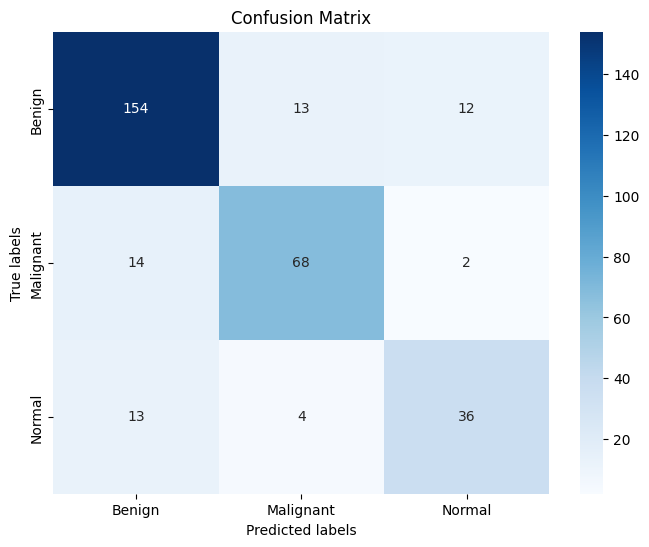


Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.86      0.86       179
   Malignant       0.80      0.81      0.80        84
      Normal       0.72      0.68      0.70        53

    accuracy                           0.82       316
   macro avg       0.79      0.78      0.79       316
weighted avg       0.82      0.82      0.82       316






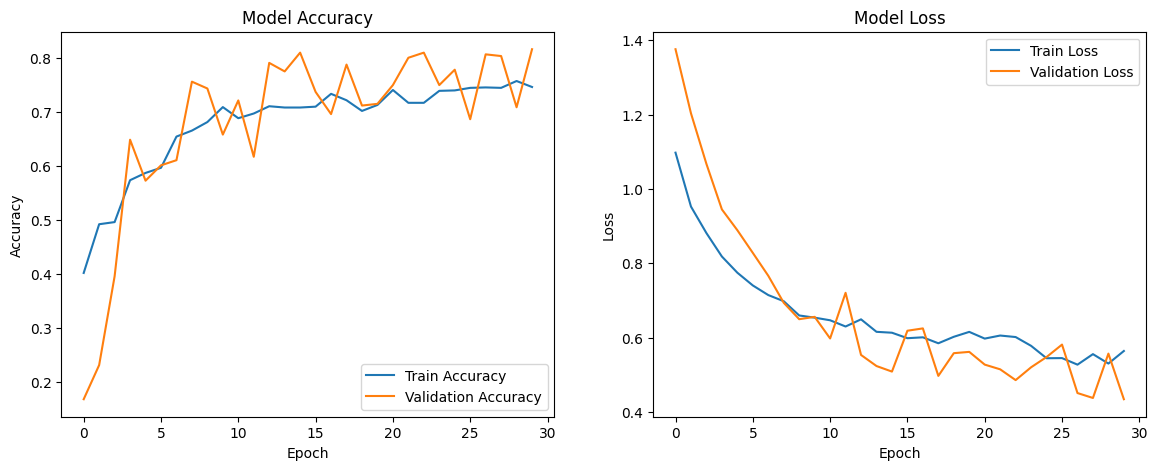

In [41]:
# Kaydedilen modeli yükle
model_path = 'resnet_model.h5'
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Kaydedilen model yüklendi.")
else:
    print("Kaydedilmiş bir model bulunamadı. Lütfen modeli eğitip kaydedin.")
    print()

# Confusion matrix ve classification report çizdirme
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.savefig("/content/Efficientnet-Confusion-Matris.png")
    plt.show()


def print_classification_report(y_true, y_pred, labels):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

# Test verisi üzerinde tahmin yapma
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Validation verisi üzerinde tahmin yapma
y_pred_val = model.predict(X_train)
y_pred_val = np.argmax(y_pred_val, axis=1)

# Confusion matrix ve classification report çizdirme
labels = ['Benign', 'Malignant', 'Normal']
plot_confusion_matrix(y_test, y_pred_test, labels)
print()
print_classification_report(y_test, y_pred_test, labels)
print()

# Eğitim ve doğrulama kaybı ile eğitim ve doğrulama doğruluğunu çizme
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/EfficientNet-Model-Accuracy.png")
print()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/EfficientNet-Model-Loss.png")
print()

plt.show()